In [3]:
# Import package
import pandas as pd

# Feature extraction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Standizer
from sklearn.decomposition import PCA # For PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Model generation
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
Path="C:\\Users\\Dell\\Documents\\Projects\\Santander-customer-transaction-prediction\\Source DataSet\\"

In [5]:
# Function definition

#https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_lda/

def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [11]:
Test=pd.read_csv(Path+"test.csv")
Train=pd.read_csv(Path+"train.csv")

In [12]:
Features=Train.columns
Feature_X=Features[2:len(Train)-1]

In [13]:
#Null Check
Null_Check=Train[Features[2:len(Train)-1]].isnull()
Null_Check.describe().loc['unique'][1:200].describe()

count     199
unique      1
top         1
freq      199
Name: unique, dtype: int64

In [14]:
#Standardizing data 
x = StandardScaler().fit_transform(Train[Features[2:len(Train)-1]])
y = Train['target']

In [9]:
pca = PCA(.85) #n_components=10
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['PCA_1', 'PCA_2','PCA_3','PCA_4']
                          )

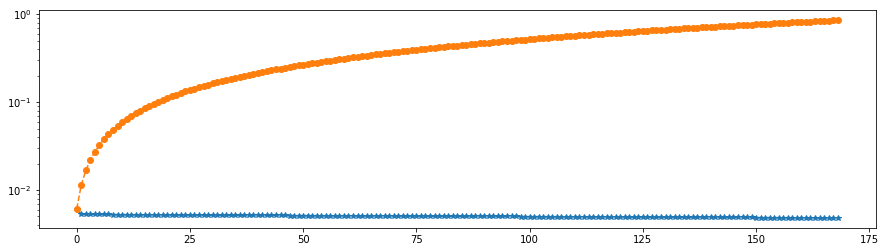

In [212]:
plt.subplots(figsize=(15,4))
plt.semilogy(pca.explained_variance_ratio_, '--*')
plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--o')
#It requires all the features

In [357]:
#Generating LDA model
model = LDA(n_components=200)
Train_X_lda = model.fit_transform(x,y)
Test_X_lda = model.transform(Test[Features[2:len(Test)-1]])

#Checking components requirement
print(select_n_components(model.explained_variance_ratio_, 0.95))     
# 1 component us suffiecient to cover 95% of data

1


In [346]:
Test_X_lda_df=pd.DataFrame(Test_X_lda)
Test_X_lda_df['ID_code']=Test['ID_code']

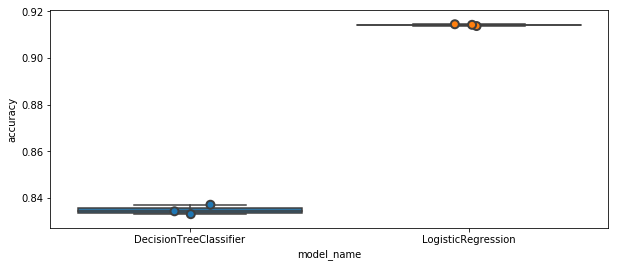

model_name
DecisionTreeClassifier    0.834895
LogisticRegression        0.914120
Name: accuracy, dtype: float64

In [10]:
# Model & Validation
models = [
    DecisionTreeClassifier(),
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LogisticRegression(random_state=0)#,
    #KNeighborsClassifier(),
    #LinearSVC()
]

CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
   # accuracies = cross_val_score(model, Train_X_lda, y, scoring='accuracy', cv=CV)
    accuracies = cross_val_score(model, Train[Features[2:len(Train)-1]], y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

fig, ax = plt.subplots(figsize=(10,4))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()


In [15]:
model=LogisticRegression()
model.fit(Train[Features[2:len(Train)-1]], y)
y_pred = model.predict(Test[Features[2:len(Test)-1]])
Test['target']=y_pred

NameError: name 'Test_X_lda_df' is not defined

In [29]:
Test.groupby('target').count()['ID_code']


target
0    193930
1      6070
Name: ID_code, dtype: int64

In [38]:
Test[['ID_code','target']].to_csv("output.csv", sep=',', index=False)